# **Regresión Lineal Múltiple: Tutorial Paso a Paso**

#### **Introducción al Problema de la Predicción de Precios de Viviendas**
Imagina que eres un asesor inmobiliario y quieres estimar el precio de una casa. ¿Qué factores tendrías en cuenta? Probablemente pensarías en el tamaño, la ubicación, la antigüedad, el número de habitaciones, la calidad de los acabados, entre otros.
El aprendizaje automático nos permite crear modelos matemáticos que pueden aprender estas relaciones a partir de datos históricos. La regresión lineal múltiple es uno de los modelos más sencillos y poderosos para este tipo de problemas.
#### **¿Qué es la Regresión Lineal Múltiple?**
La regresión lineal múltiple es una extensión de la regresión lineal simple. En vez de usar una sola característica (como el tamaño de la casa) para predecir el precio, usamos varias características simultáneamente.

El modelo tiene la forma:
**Precio = θ₀ + θ₁ × (Tamaño) + θ₂ × (Calidad) + θ₃ × (Antigüedad) + ...**

Donde:
θ₀ es el "intercepto" o término base (el precio cuando todas las demás variables son cero)
θ₁, θ₂, θ₃, ... son los "coeficientes" que indican cuánto cambiaría el precio cuando cada característica cambia en una unidad

#### **La Ecuación Normal: Una Solución Directa**
Hay dos formas principales de encontrar los mejores valores para estos coeficientes:

**1. La Ecuación Normal:** un método directo que calcula la solución exacta en un solo paso
**2. El Descenso de Gradiente:** un método iterativo que va mejorando los coeficientes poco a poco

En este tutorial, nos enfocamos en la Ecuación Normal. Esta fórmula se deriva de calcular dónde se minimiza el Error Cuadrático Medio (MSE) entre nuestras predicciones y los valores reales.
La Ecuación Normal es: θ = (X^T × X)^(-1) × X^T × y
Esto puede parecer intimidante, pero realmente es solo una serie de operaciones matriciales que encuentran los valores óptimos de todos los coeficientes a la vez.

##### **1. Importación de librerías**

In [21]:
import numpy as np              # Para operaciones matemáticas y manipulación de arrays
import matplotlib.pyplot as plt # Para visualizar datos y resultados
import pandas as pd             # Para manipular y analizar datos estructurados
import seaborn as sns           # Para gráficos estadísticos más avanzados
from sklearn.model_selection import train_test_split  # Para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import mean_squared_error        # Para evaluar el rendimiento del modelo
from sklearn.preprocessing import StandardScaler      # Para estandarizar las características

# Configuramos un estilo visual atractivo para nuestros gráficos
plt.style.use('seaborn-v0_8-whitegrid')  # Fondo blanco con cuadrícula para mejor legibilidad

##### **2. Cargar y explorar los datos**

Primeras 5 filas del conjunto de datos:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Dimensiones del conjunto de datos:
Número de casas (filas): 1460
Número de características (columnas): 81


Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object


Estadísticas descriptivas de precio de venta (SalePrice):


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Precio mínimo: $34,900.00
Precio máximo: $755,000.00
Precio promedio: $180,921.20
Precio mediano: $163,000.00


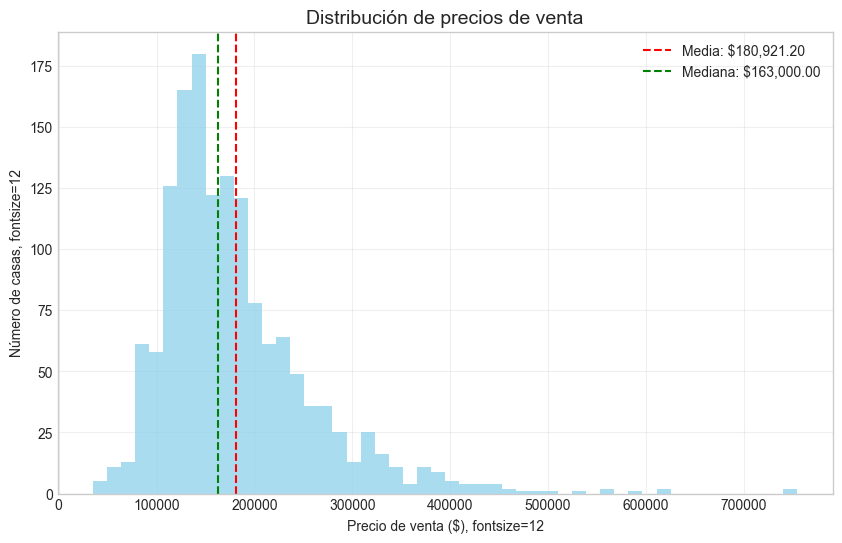


Columnas con valores faltantes (mostrando solo las que tienen al menos uno):


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [38]:
train_data = pd.read_csv('../data/train.csv')

# Mostramos las primeras filas para ver la estructura de los datos
print("Primeras 5 filas del conjunto de datos:")
# display() es una función especial de Jupyter que muestra datos de forma más elegante y estructurada
# (a diferencia de print() que muestra texto plano)
display(train_data.head()) # head() muestra las primeras 5 filas del DataFrame por defecto

# Información básca sobre el conjunto de datos
print("\nDimensiones del conjunto de datos:")
print(f"Número de casas (filas): {train_data.shape[0]}") # shape[0] devuelve el número de filas
print(f"Número de características (columnas): {train_data.shape[1]}") # shape[1] devuelve el número de columnas

# ¿Qué tipo de datos tenemos en cada columna?
display(train_data.dtypes.head(10)) # dtypes muestra el tipo de datos de cada columna

# Exploramos las estadísticas de la variable que queremos predecir: SalePrice
print("\nEstadísticas descriptivas de precio de venta (SalePrice):")
# describe() genera estadísticas descriptivas: conteo, media, desviación estándar, mínimo, cuartiles, máximo
sale_price_stats = train_data['SalePrice'].describe()
display(sale_price_stats)

print(f"\nPrecio mínimo: ${sale_price_stats['min']:,.2f}") # :,.2f formatea el número con comas y 2 decimales
print(f"Precio máximo: ${sale_price_stats['max']:,.2f}")
print(f"Precio promedio: ${sale_price_stats['mean']:,.2f}")
print(f"Precio mediano: ${sale_price_stats['50%']:,.2f}")

# Visualizamos la distribución de los precios de venta
# Esto nos da una idea de como se distribueyn los precios en el mercado
plt.figure(figsize=(10, 6)) # Crea una figura con un tamaño específico en pulgadas (ancho, alto)
# hist() crea un histograma: divide los datos en rangos (bins) y cuenta cuántos valores caen en cada rango
plt.hist(train_data['SalePrice'], bins=50, color='skyblue', alpha=0.7) # bins=50 divide los datos en 50 rangos, alpha=0.7 hace el color un poco transparente
# axvline() añáde una línea vertical en una posición x específica
plt.axvline(sale_price_stats['mean'], color='red', linestyle='--', label=f'Media: ${sale_price_stats["mean"]:,.2f}') 
plt.axvline(sale_price_stats['50%'], color='green', linestyle='--', label=f'Mediana: ${sale_price_stats["50%"]:,.2f}')
plt.xlabel('Precio de venta ($), fontsize=12') # Etiqueta del eje x
plt.ylabel('Número de casas, fontsize=12') # Etiqueta del eje y
plt.title('Distribución de precios de venta', fontsize=14) # Título del gráfico
plt.grid(True, alpha=0.3) # Añade una cuadrícula al gráfico, alpha controla la transparencia
plt.legend() # Muestra la leyenda con las etiquetas definidas en el label
plt.show() # Muestra el gráfico

# ¿Los datos tienen valores faltantes?
missing_data = train_data.isnull().sum() # isnull() marca valores faltantes como True, sum() los cuenta por columna
print("\nColumnas con valores faltantes (mostrando solo las que tienen al menos uno):")
display(missing_data[missing_data > 0].sort_values(ascending=False))  # Filtramos y ordenamos


##### **3. Analizar las Relaciones entre Variables**

Analizando 38 características numéricas.

Correlaciones más fuertes con el precio de venta:
(Una correlación cercana a 1 indica una fuerte relacion positiva)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


Correlaciones más débiles con el precio de venta:
(Una correlación cercana a 0 indica poca o ninguna relación lineal)


BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

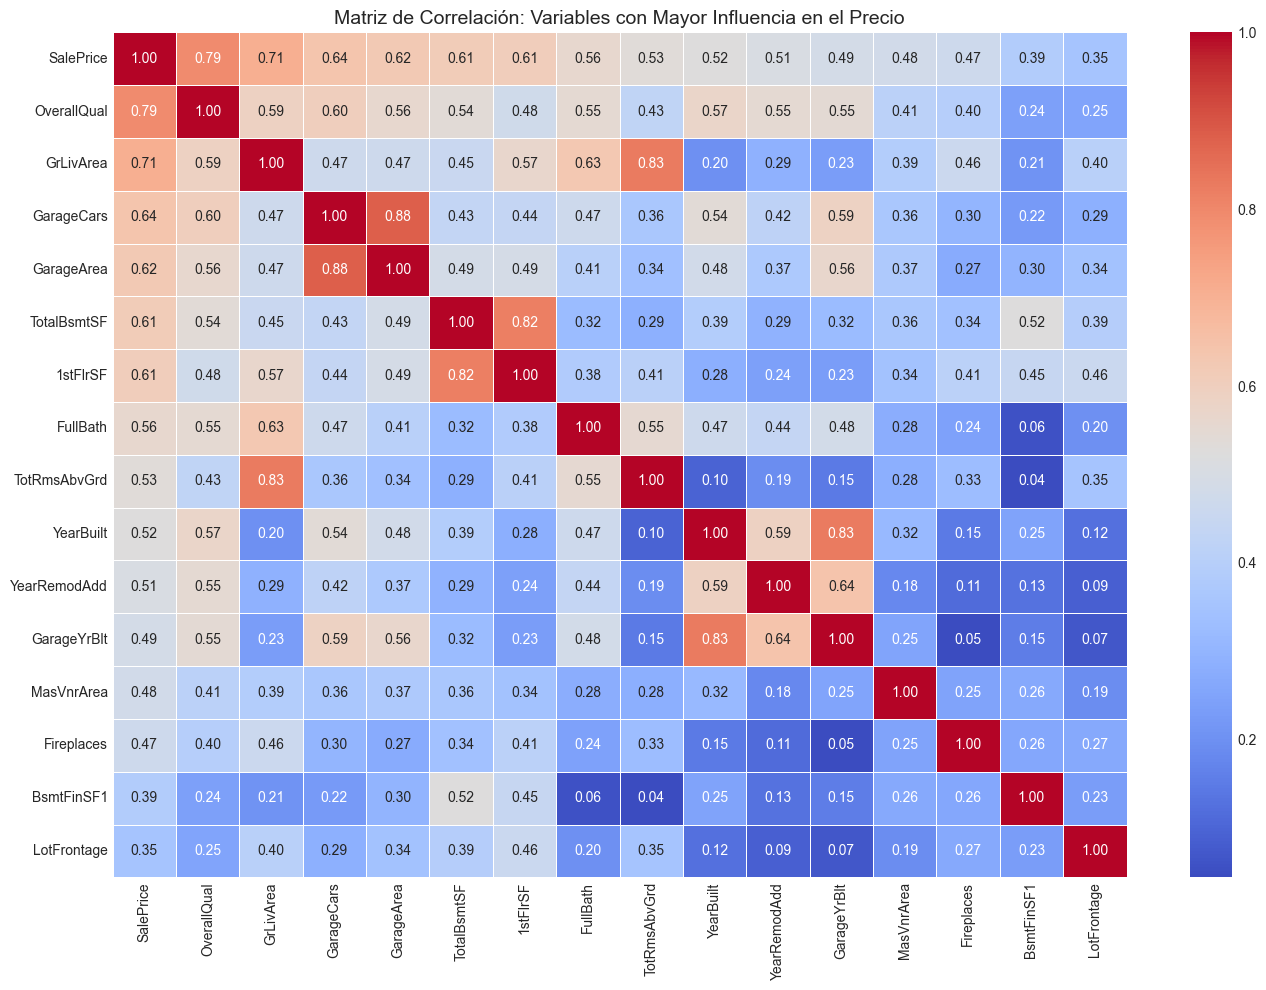


Explicación de las características más importantes:
- OverallQual: Calidad general del material y acabado de la casa (1-10)
  Correlación con el precio: 0.7910
  Interpretación: Fuerte relación positiva
- GrLivArea: Superficie habitable sobre el nivel del suelo (pies cuadrados)
  Correlación con el precio: 0.7086
  Interpretación: Fuerte relación positiva
- GarageCars: Tamaño del garaje en capacidad de autos
  Correlación con el precio: 0.6404
  Interpretación: Moderada relación positiva
- GarageArea: Tamaño del garaje en pies cuadrados
  Correlación con el precio: 0.6234
  Interpretación: Moderada relación positiva
- TotalBsmtSF: Superficie total del sótano (pies cuadrados)
  Correlación con el precio: 0.6136
  Interpretación: Moderada relación positiva


In [52]:
# Seleccionamos solo columnas numéricas para el análisis de correlación
# Las correlaciones solo funcionan con datos numéricos
# select_dtypes() filtra columnas por tipo de datos
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = train_data[numeric_columns]

print(f"Analizando {len(numeric_columns)} características numéricas.")

# Calculamos la matriz de correlación
# corr() calcula las correlaciones entre todas las columnas numéricas
# La correlación mide la fuerza y dirección de la relación lineal entre dos variables
# Varía de -1 (correlación negativa perfecta) a +1 (correlación positiva perfecta)
correlation_matrix = numeric_data.corr()

# Obtenemos las correlaciones con el precio de venta y las ordenamos
# sort_values() ordena los valores, ascending=False significa orden descendente
correlations_with_price = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("\nCorrelaciones más fuertes con el precio de venta:")
print("(Una correlación cercana a 1 indica una fuerte relacion positiva)")
display(correlations_with_price.head(10))  # head(10) muestra las primeras 10 filas

print("\nCorrelaciones más débiles con el precio de venta:")
print("(Una correlación cercana a 0 indica poca o ninguna relación lineal)")
display(correlations_with_price.tail(10))  # tail(10) muestra las últimas 10 filas


# Visualizamos las correlaciones con un mapa de calor
# Limitamos a las 15 variables más correlacionadas con SalePrice para mayor claridad
plt.figure(figsize=(14, 10))

# Seleccionamos las características más correlacionadas con el precio
top_corr_features = correlations_with_price.head(16).index  # Incluye SalePrice
top_corr_matrix = numeric_data[top_corr_features].corr()

# Creamos el mapa de calor usando seaborn
# heatmap() crea un mapa donde los colores representan los valores (aquí, correlaciones)
sns.heatmap(top_corr_matrix,  # Datos a visualizar
            annot=True,       # Muestra el valor numérico en cada celda
            cmap='coolwarm',  # Esquema de colores (azul=negativo, rojo=positivo)
            fmt='.2f',        # Formato de los números (2 decimales)
            linewidths=0.5)   # Añade líneas entre celdas para mejor visualización
plt.title('Matriz de Correlación: Variables con Mayor Influencia en el Precio', fontsize=14)
plt.tight_layout()  # Ajusta automáticamente el espaciado para que todo sea visible
plt.show()

# Explicamos el significado de algunas de las características más importantes
print("\nExplicación de las características más importantes:")
top_features_list = correlations_with_price.head(6).index.tolist()[1:]  # Excluimos SalePrice
# tolist() convierte el índice a una lista de Python

feature_explanations = {  # Diccionario con explicaciones de las características
    'OverallQual': 'Calidad general del material y acabado de la casa (1-10)',
    'GrLivArea': 'Superficie habitable sobre el nivel del suelo (pies cuadrados)',
    'GarageCars': 'Tamaño del garaje en capacidad de autos',
    'TotalBsmtSF': 'Superficie total del sótano (pies cuadrados)',
    'FullBath': 'Número de baños completos',
    '1stFlrSF': 'Superficie del primer piso (pies cuadrados)',
    'TotRmsAbvGrd': 'Número total de habitaciones sobre el nivel del suelo',
    'YearBuilt': 'Año original de construcción',
    'YearRemodAdd': 'Año de remodelación (igual a YearBuilt si no ha sido remodelada)',
    'GarageArea': 'Tamaño del garaje en pies cuadrados',
    'Fireplaces': 'Número de chimeneas'
}

for feature in top_features_list:
    explanation = feature_explanations.get(feature, "No hay explicación disponible")
    # get() busca la clave en el diccionario y devuelve un valor predeterminado si no la encuentra
    correlation = correlations_with_price[feature]
    print(f"- {feature}: {explanation}")
    print(f"  Correlación con el precio: {correlation:.4f}")
    print(f"  Interpretación: {'Fuerte' if correlation > 0.7 else 'Moderada' if correlation > 0.5 else 'Débil'} relación positiva")


##### **4. Visualizar Relaciones entre Características y Precio**


Las 5 características con mayor influencia en el precio:
1. OverallQual: correlación de 0.7910
2. GrLivArea: correlación de 0.7086
3. GarageCars: correlación de 0.6404
4. GarageArea: correlación de 0.6234
5. TotalBsmtSF: correlación de 0.6136


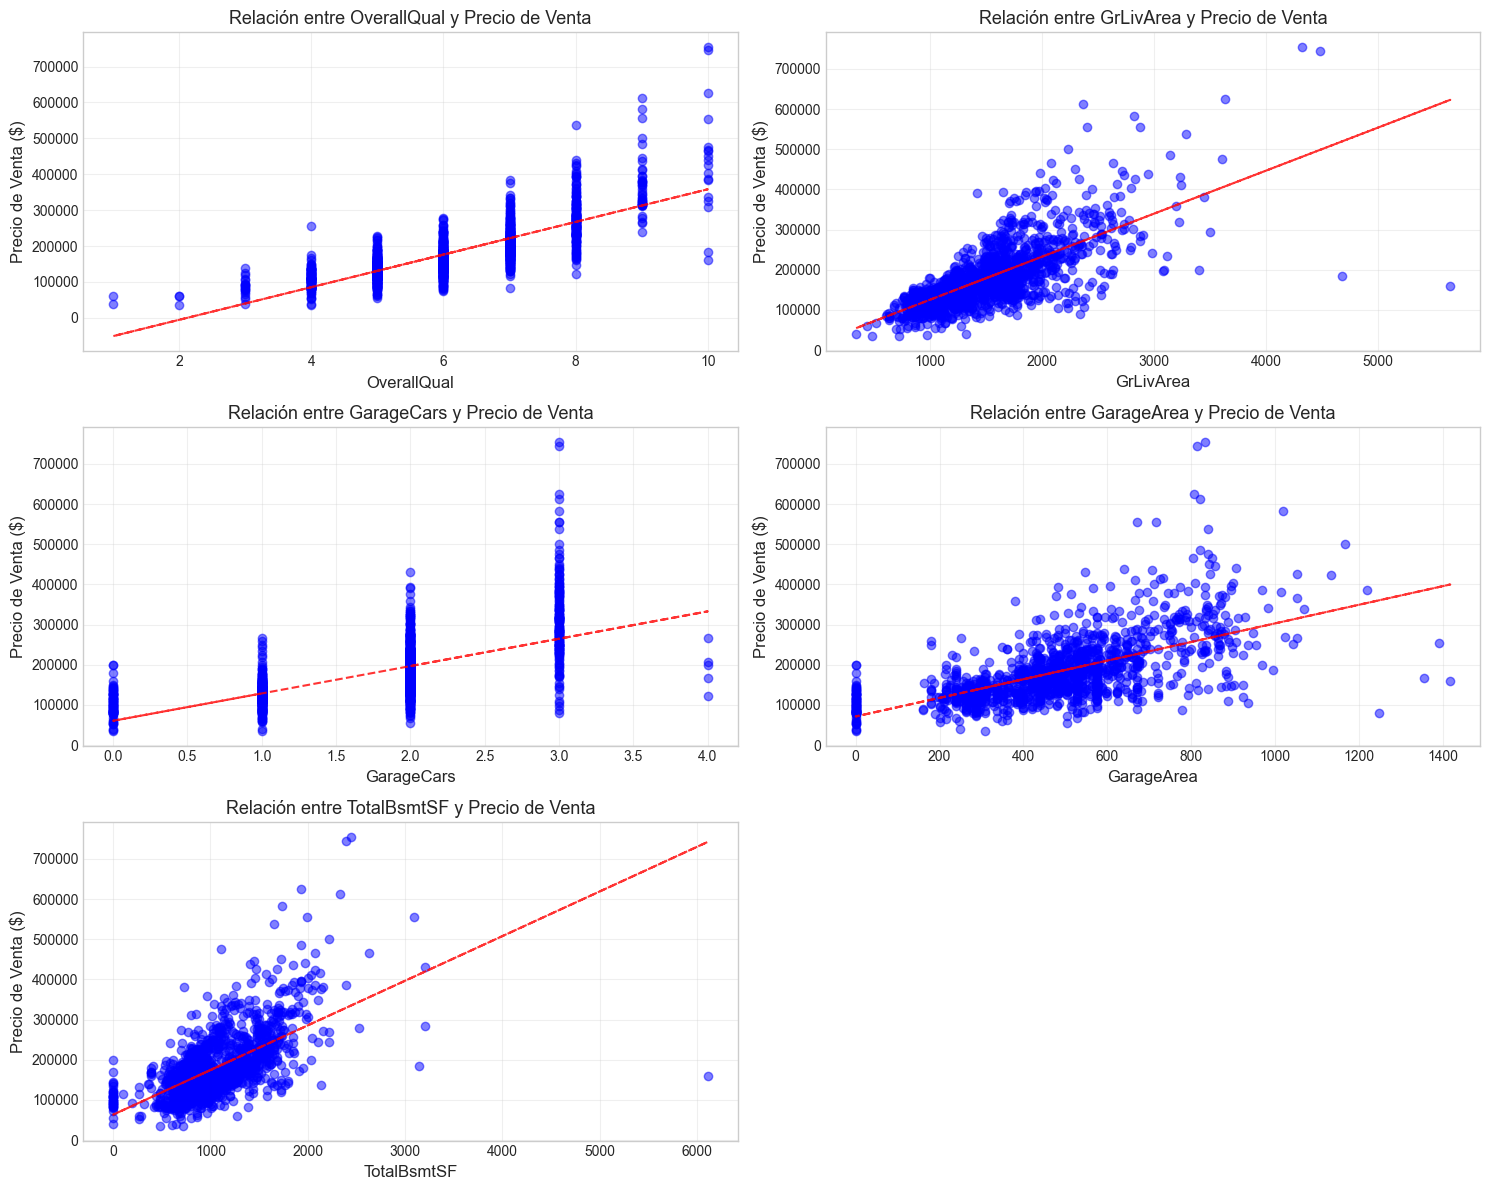


Interpretación de los gráficos de dispersión:
- Cada punto representa una casa
- El eje X muestra el valor de la característica
- El eje Y muestra el precio de venta
- La línea roja muestra la tendencia general
- Puntos agrupados cerca de la línea indican una fuerte relación lineal
- Puntos dispersos lejos de la línea sugieren que hay otros factores influyendo


In [53]:
# Seleccionamos las 5 mejores características (excluyendo SalePrice)
top_features = correlations_with_price.index[1:6]  # Las 5 con mayor correlación después de SalePrice

print(f"\nLas 5 características con mayor influencia en el precio:")
for i, feature in enumerate(top_features, 1):  # enumerate() añade un contador a un iterable
    # start=1 hace que el contador empiece en 1 en lugar de 0
    corr_value = correlations_with_price[feature]
    print(f"{i}. {feature}: correlación de {corr_value:.4f}")
    
# Visualizamos la relación entre cada característica seleccionada y el precio
# subplots() crea múltiples gráficos en una sola figura
# Devuelve la figura (fig) y un array de ejes (axes)
fig, axes = plt.subplots(nrows=3,  # 3 filas
                         ncols=2,  # 2 columnas
                         figsize=(15, 12))  # Tamaño total de la figura en pulgadas
# flatten() convierte el array 2D de ejes en un array 1D para facilitar su uso en bucles
axes = axes.flatten()

for i, feature in enumerate(top_features):
    if i < 5:  # Solo tenemos 5 gráficos para llenar (en una rejilla 3x2)
        ax = axes[i]  # Seleccionamos el eje actual
        # scatter() crea un gráfico de dispersión (cada punto representa un par de valores)
        ax.scatter(train_data[feature],  # Valores para el eje X (característica)
                   train_data['SalePrice'],  # Valores para el eje Y (precio)
                   alpha=0.5,  # Transparencia de los puntos
                   color='blue')  # Color de los puntos
        ax.set_xlabel(feature, fontsize=12)  # Etiqueta del eje X
        ax.set_ylabel('Precio de Venta ($)', fontsize=12)  # Etiqueta del eje Y
        ax.set_title(f'Relación entre {feature} y Precio de Venta', fontsize=13)  # Título del gráfico
        ax.grid(True, alpha=0.3)  # Añade una cuadrícula ligera
        
        # Añadimos una línea de tendencia para visualizar mejor la relación
        # polyfit() encuentra los coeficientes de un polinomio que mejor se ajusta a los datos
        # Aquí usamos grado 1, que es una línea recta (regresión lineal simple)
        z = np.polyfit(train_data[feature], train_data['SalePrice'], 1)
        # poly1d() crea una función polinómica a partir de los coeficientes
        p = np.poly1d(z)
        # plot() dibuja una línea conectando puntos
        ax.plot(train_data[feature],  # Valores X
                p(train_data[feature]),  # Valores Y calculados con la función polinómica
                "r--",  # Estilo de línea: rojo (r) y discontinua (--)
                alpha=0.8)  # Transparencia de la línea

# Eliminamos el gráfico vacío si hay uno
# En una rejilla 3x2 tenemos 6 espacios, pero solo 5 características
if len(top_features) < 6:
    # delaxes() elimina un eje específico de la figura
    fig.delaxes(axes[5])  # Eliminamos el sexto eje (índice 5)

plt.tight_layout()  # Ajusta automáticamente el espaciado entre subgráficos
plt.show()

# Explicamos lo que vemos en los gráficos
print("\nInterpretación de los gráficos de dispersión:")
print("- Cada punto representa una casa")
print("- El eje X muestra el valor de la característica")
print("- El eje Y muestra el precio de venta")
print("- La línea roja muestra la tendencia general")
print("- Puntos agrupados cerca de la línea indican una fuerte relación lineal")
print("- Puntos dispersos lejos de la línea sugieren que hay otros factores influyendo")

##### **5. Preparar los Datos para el Modelo**

In [55]:
# Preparamos los datos para la regresión lineal múltiple

# 1. Seleccionamos las características que usaremos y la variable objetivo
X = train_data[top_features].values  # Variables independientes (características)
# values convierte los datos de DataFrame a un array NumPy más eficiente para cálculos
y = train_data['SalePrice'].values.reshape(-1, 1)  # Variable dependiente (precio)
# reshape(-1, 1) convierte un array 1D en una columna (array 2D)
# -1 significa "inferir automáticamente este tamaño"

print("Forma de los datos de entrada:")
print(f"X (características): {X.shape} - Cada fila es una casa, cada columna una característica")
print(f"y (precios): {y.shape} - Vector columna con los precios")

# 2. Dividimos los datos en conjuntos de entrenamiento y validación
# train_test_split() divide aleatoriamente los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(
    X, y,                  # Datos a dividir
    test_size=0.2,         # Proporción para el conjunto de prueba (20%)
    random_state=42)       # Semilla para reproducibilidad (mismo resultado cada vez)

print(f"\nDivisión de datos:")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} casas ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Conjunto de validación: {X_val.shape[0]} casas ({X_val.shape[0]/X.shape[0]*100:.1f}%)")

# 3. Estandarizamos las características para que tengan la misma escala
# Esto es crucial para la regresión lineal múltiple porque:
# - Mejora la convergencia numérica
# - Hace que los coeficientes sean comparables entre sí
print("\nPor qué estandarizamos:")
print("- Algunas características como GrLivArea pueden tener valores de miles")
print("- Otras como OverallQual solo van de 1-10")
print("- La estandarización pone todas las variables en una escala similar (media 0, desviación estándar 1)")

# StandardScaler() transforma los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
# fit_transform() ajusta el escalador a los datos y luego los transforma
X_train_scaled = scaler.fit_transform(X_train)
# transform() aplica la misma transformación (usando medias/desviaciones calculadas de X_train)
X_val_scaled = scaler.transform(X_val)

# Mostramos un ejemplo antes y después de la estandarización
print("\nEjemplo de estandarización (primera casa del conjunto de entrenamiento):")
print("Valores originales:")
for i, feature in enumerate(top_features):
    print(f"- {feature}: {X_train[0, i]}")

print("\nValores estandarizados:")
for i, feature in enumerate(top_features):
    print(f"- {feature}: {X_train_scaled[0, i]:.4f}")
    if X_train_scaled[0, i] > 0:
        print(f"  (Por encima de la media)")
    else:
        print(f"  (Por debajo de la media)")

Forma de los datos de entrada:
X (características): (1460, 5) - Cada fila es una casa, cada columna una característica
y (precios): (1460, 1) - Vector columna con los precios

División de datos:
Conjunto de entrenamiento: 1168 casas (80.0%)
Conjunto de validación: 292 casas (20.0%)

Por qué estandarizamos:
- Algunas características como GrLivArea pueden tener valores de miles
- Otras como OverallQual solo van de 1-10
- La estandarización pone todas las variables en una escala similar (media 0, desviación estándar 1)

Ejemplo de estandarización (primera casa del conjunto de entrenamiento):
Valores originales:
- OverallQual: 5
- GrLivArea: 1314
- GarageCars: 1
- GarageArea: 294
- TotalBsmtSF: 1314

Valores estandarizados:
- OverallQual: -0.8204
  (Por debajo de la media)
- GrLivArea: -0.4071
  (Por debajo de la media)
- GarageCars: -1.0565
  (Por debajo de la media)
- GarageArea: -0.8638
  (Por debajo de la media)
- TotalBsmtSF: 0.5726
  (Por encima de la media)


##### **6. Implementar la Regresión Lineal Multiple usando la Ecuación Normal**

In [56]:
# 1. Añadimos una columna de unos al inicio de nuestras matrices de características
# Esta columna representa el término de intercepto (bias/sesgo)
# Es como añadir una "característica base" que siempre vale 1
# np.c_[] concatena arrays a lo largo del segundo eje (columnas)
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val_b = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

print("Forma de las matrices con columna de unos añadida:")
print(f"X_train_b: {X_train_b.shape} - Ahora tenemos una columna extra para el intercepto")

# 2. Aplicamos la ecuación normal: θ = (X^T * X)^(-1) * X^T * y
# Esta fórmula encuentra los valores óptimos de los parámetros que minimizan el error cuadrático
print("\nPasos de la Ecuación Normal:")
print("a) Calculamos X^T (transpuesta de X)")
print("b) Multiplicamos X^T * X")
print("c) Calculamos la inversa de (X^T * X)")
print("d) Multiplicamos por X^T * y")
print("Resultado: Obtenemos directamente los valores óptimos de los parámetros")

# Paso a paso (para entender el proceso):
# .T calcula la transpuesta de una matriz (intercambia filas por columnas)
X_train_b_T = X_train_b.T
# .dot() realiza multiplicación de matrices
X_T_X = X_train_b_T.dot(X_train_b)
# np.linalg.inv() calcula la inversa de una matriz
X_T_X_inv = np.linalg.inv(X_T_X)
X_T_y = X_train_b_T.dot(y_train)
# Resultado final: los parámetros óptimos
theta_best = X_T_X_inv.dot(X_T_y)

# O todo en una línea (lo mismo que arriba, pero más conciso):
# theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# 3. Extraemos e interpretamos los parámetros aprendidos
intercept = theta_best[0][0]  # El término independiente (θ₀)
coefficients = theta_best[1:]  # Los coeficientes para nuestras características

print(f"\nParámetros óptimos encontrados con la Ecuación Normal:")
print(f"Intercepto (θ₀): {intercept:.2f}")
print("Este valor representa el precio 'base' cuando todas las características están en su valor promedio")

print("\nCoeficientes para cada característica:")
for i, feature in enumerate(top_features):
    print(f"{feature} (θ{i+1}): {coefficients[i][0]:.4f}")
    
    # Interpretación del signo
    if coefficients[i][0] > 0:
        print(f"  → Relación positiva: Aumentar {feature} tiende a aumentar el precio")
    else:
        print(f"  → Relación negativa: Aumentar {feature} tiende a disminuir el precio")
    
    # Interpretación de la magnitud
    abs_coef = abs(coefficients[i][0])
    if abs_coef > 0.5:
        impact = "Fuerte"
    elif abs_coef > 0.2:
        impact = "Moderado"
    else:
        impact = "Débil"
    print(f"  → Impacto relativo: {impact}")

print("\nNOTA IMPORTANTE: Como los datos están estandarizados, los coeficientes representan")
print("la importancia relativa de cada característica, no el cambio en dólares directamente.")
print("Mayor valor absoluto = mayor influencia en el precio.")

Forma de las matrices con columna de unos añadida:
X_train_b: (1168, 6) - Ahora tenemos una columna extra para el intercepto

Pasos de la Ecuación Normal:
a) Calculamos X^T (transpuesta de X)
b) Multiplicamos X^T * X
c) Calculamos la inversa de (X^T * X)
d) Multiplicamos por X^T * y
Resultado: Obtenemos directamente los valores óptimos de los parámetros

Parámetros óptimos encontrados con la Ecuación Normal:
Intercepto (θ₀): 181441.54
Este valor representa el precio 'base' cuando todas las características están en su valor promedio

Coeficientes para cada característica:
OverallQual (θ1): 32584.1658
  → Relación positiva: Aumentar OverallQual tiende a aumentar el precio
  → Impacto relativo: Fuerte
GrLivArea (θ2): 22242.0296
  → Relación positiva: Aumentar GrLivArea tiende a aumentar el precio
  → Impacto relativo: Fuerte
GarageCars (θ3): 11773.8948
  → Relación positiva: Aumentar GarageCars tiende a aumentar el precio
  → Impacto relativo: Fuerte
GarageArea (θ4): 3293.0110
  → Relació

#### **7. Evaluar el Modelo con Múltples Métricas**

In [59]:
# 1. Hacemos predicciones usando nuestro modelo
# La predicción es simplemente la multiplicación matricial de X por los parámetros θ
y_train_pred = X_train_b.dot(theta_best)  # Predicciones en datos de entrenamiento
y_val_pred = X_val_b.dot(theta_best)      # Predicciones en datos de validación

# 2. Visualizamos algunos ejemplos de predicciones vs valores reales
print("Ejemplos de predicciones (primeras 5 casas del conjunto de validación):")
for i in range(5):
    precio_real = y_val[i][0]
    precio_pred = y_val_pred[i][0]
    error = precio_real - precio_pred
    error_porcentaje = (error / precio_real) * 100
    
    print(f"Casa #{i+1}:")
    print(f"  Precio real: ${precio_real:,.2f}")
    print(f"  Precio predicho: ${precio_pred:,.2f}")
    print(f"  Error: ${error:,.2f} ({error_porcentaje:.2f}%)")
    print()

# 3. Calculamos múltiples métricas de evaluación

# Error Cuadrático Medio (MSE) - Nuestra función de coste principal
# mean_squared_error() de sklearn calcula el promedio de los errores al cuadrado
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# Raíz del Error Cuadrático Medio (RMSE) - En unidades originales (dólares)
# La raíz cuadrada de MSE
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

# Error Absoluto Medio (MAE) - Menos sensible a valores atípicos
# La media de los valores absolutos de los errores
mae_train = np.mean(np.abs(y_train - y_train_pred))
mae_val = np.mean(np.abs(y_val - y_val_pred))

# Error Porcentual Absoluto Medio (MAPE) - Error en términos de porcentaje
# La media de los valores absolutos de los errores porcentuales
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

# Coeficiente de Determinación (R²) - Proporción de varianza explicada
# Calculado manualmente como 1 - (suma de cuadrados de residuos / suma total de cuadrados)
ss_res_train = ((y_train - y_train_pred) ** 2).sum()
ss_tot_train = ((y_train - y_train.mean()) ** 2).sum()
r2_train = 1 - (ss_res_train / ss_tot_train)

ss_res_val = ((y_val - y_val_pred) ** 2).sum()
ss_tot_val = ((y_val - y_val.mean()) ** 2).sum()
r2_val = 1 - (ss_res_val / ss_tot_val)

# 4. Imprimimos los resultados con explicaciones detalladas
print("Métricas de Evaluación del Modelo:\n")

print(f"Error Cuadrático Medio (MSE):")
print(f"  - En entrenamiento: ${mse_train:.2f}")
print(f"  - En validación: ${mse_val:.2f}")
print(f"  Interpretación: El MSE es la función de coste que estamos minimizando.")
print(f"  Penaliza más los errores grandes que los pequeños. Menor es mejor.\n")

print(f"Raíz del Error Cuadrático Medio (RMSE):")
print(f"  - En entrenamiento: ${rmse_train:.2f}")
print(f"  - En validación: ${rmse_val:.2f}")
print(f"  Interpretación: La raíz cuadrada del MSE. Está en las mismas unidades que el precio")
print(f"  (dólares), lo que facilita su interpretación. En promedio, nuestras predicciones")
print(f"  tienen un error de ${rmse_val:.2f}.\n")

print(f"Error Absoluto Medio (MAE):")
print(f"  - En entrenamiento: ${mae_train:.2f}")
print(f"  - En validación: ${mae_val:.2f}")
print(f"  Interpretación: Promedio de los errores absolutos. No penaliza tanto los")
print(f"  errores grandes como el MSE. En promedio, nuestras predicciones se desvían")
print(f"  ${mae_val:.2f} del valor real.\n")

print(f"Error Porcentual Absoluto Medio (MAPE):")
print(f"  - En entrenamiento: {mape_train:.2f}%")
print(f"  - En validación: {mape_val:.2f}%")
print(f"  Interpretación: Error promedio en términos de porcentaje. Útil para entender")
print(f"  la magnitud relativa del error. Nuestras predicciones tienen un error promedio")
print(f"  del {mape_val:.2f}% respecto al precio real.\n")

print(f"Coeficiente de determinación (R²):")
print(f"  - En entrenamiento: {r2_train:.4f}")
print(f"  - En validación: {r2_val:.4f}")
print(f"  Interpretación: Indica qué proporción de la varianza en los precios es explicada")
print(f"  por nuestro modelo. Varía de 0 a 1, donde 1 significa una predicción perfecta.")
print(f"  Nuestro modelo explica aproximadamente el {r2_val*100:.2f}% de la variabilidad")
print(f"  en los precios de venta usando las {len(top_features)} características seleccionadas.\n")

# Interpretación general del rendimiento
r2_val_pct = r2_val * 100
if r2_val > 0.8:
    performance = "excelente"
elif r2_val > 0.6:
    performance = "bueno"
elif r2_val > 0.4:
    performance = "moderado"
else:
    performance = "pobre"


print(f"Evaluación general: El modelo tiene un rendimiento {performance}, explicando")
print(f"el {r2_val_pct:.2f}% de la variación en los precios. El error promedio de")
print(f"${rmse_val:.2f} representa aproximadamente el {(rmse_val/np.mean(y_val))*100:.2f}%")
print(f"del precio promedio de una vivienda en el conjunto de validación.")

Ejemplos de predicciones (primeras 5 casas del conjunto de validación):
Casa #1:
  Precio real: $154,500.00
  Precio predicho: $143,222.75
  Error: $11,277.25 (7.30%)

Casa #2:
  Precio real: $325,000.00
  Precio predicho: $290,845.78
  Error: $34,154.22 (10.51%)

Casa #3:
  Precio real: $115,000.00
  Precio predicho: $133,699.58
  Error: $-18,699.58 (-16.26%)

Casa #4:
  Precio real: $159,000.00
  Precio predicho: $185,346.96
  Error: $-26,346.96 (-16.57%)

Casa #5:
  Precio real: $315,500.00
  Precio predicho: $295,519.68
  Error: $19,980.32 (6.33%)

Métricas de Evaluación del Modelo:

Error Cuadrático Medio (MSE):
  - En entrenamiento: $1491922047.99
  - En validación: $1598354833.09
  Interpretación: El MSE es la función de coste que estamos minimizando.
  Penaliza más los errores grandes que los pequeños. Menor es mejor.

Raíz del Error Cuadrático Medio (RMSE):
  - En entrenamiento: $38625.41
  - En validación: $39979.43
  Interpretación: La raíz cuadrada del MSE. Está en las mism

##### **8. Visualización de las Predicciones vs Valores Reales**

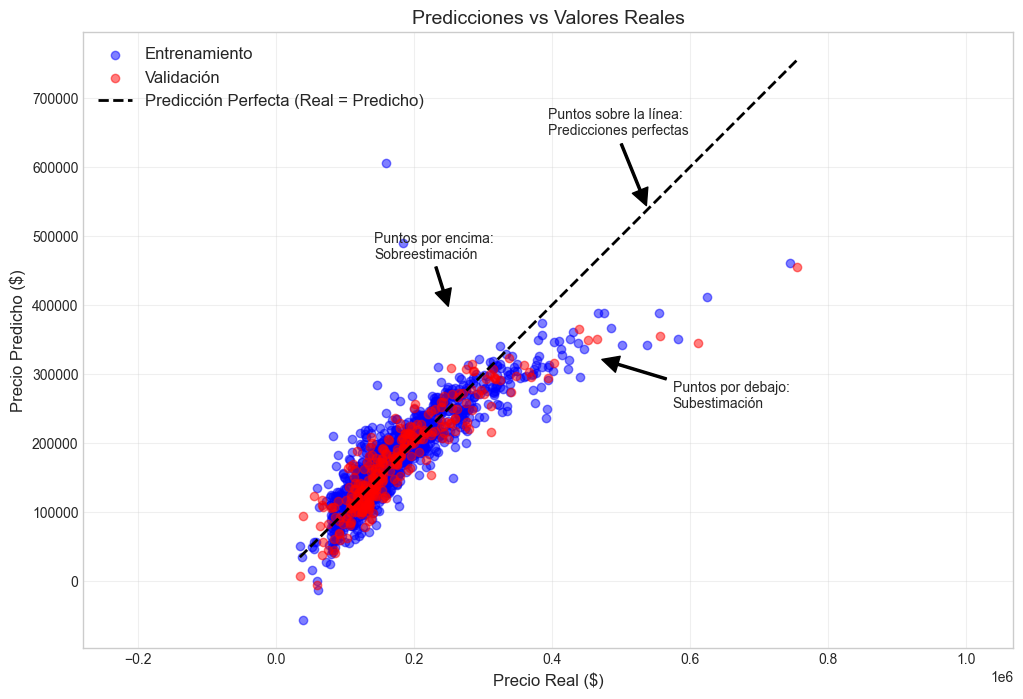

Interpretación del gráfico de predicciones vs valores reales:
- Cada punto representa una casa
- El eje X muestra su precio real
- El eje Y muestra el precio predicho por nuestro modelo
- La línea diagonal punteada representa la predicción perfecta (real = predicho)
- Puntos cercanos a la línea indican buenas predicciones
- Puntos alejados de la línea indican errores grandes
- Puntos por encima de la línea: el modelo sobreestima el precio
- Puntos por debajo de la línea: el modelo subestima el precio


In [60]:
plt.figure(figsize=(12, 8))  # Crea una figura de 12x8 pulgadas

# Datos de entrenamiento - azul
# Graficamos los precios reales vs los predichos para el conjunto de entrenamiento
plt.scatter(y_train,         # Valores en el eje X (precios reales)
           y_train_pred,     # Valores en el eje Y (precios predichos)
           alpha=0.5,        # Transparencia de los puntos
           color='blue',     # Color azul para identificar datos de entrenamiento
           label='Entrenamiento')  # Etiqueta para la leyenda

# Datos de validación - rojo
# Hacemos lo mismo para el conjunto de validación
plt.scatter(y_val, 
           y_val_pred, 
           alpha=0.5, 
           color='red',      # Color rojo para identificar datos de validación
           label='Validación')

# Línea de predicción perfecta
# Calculamos los límites para dibujar la línea diagonal
max_price = max(np.max(y_train), np.max(y_val))
min_price = min(np.min(y_train), np.min(y_val))
# Dibujamos una línea diagonal que representa predicciones perfectas (y_real = y_pred)
plt.plot([min_price, max_price],       # Puntos X para la línea
         [min_price, max_price],       # Puntos Y para la línea
         'k--',                        # Estilo: negro ('k') y discontinua ('--')
         lw=2,                         # Ancho de línea
         label='Predicción Perfecta (Real = Predicho)')

plt.xlabel('Precio Real ($)', fontsize=12)
plt.ylabel('Precio Predicho ($)', fontsize=12)
plt.title('Predicciones vs Valores Reales', fontsize=14)
plt.grid(True, alpha=0.3)  # Añade una cuadrícula ligera
plt.legend(fontsize=12)    # Añade una leyenda con las etiquetas definidas
plt.axis('equal')          # Hace que los ejes X e Y tengan la misma escala

# Añadimos anotaciones explicativas
# annotate() agrega texto con una flecha apuntando a un punto específico
plt.annotate('Puntos sobre la línea:\nPredicciones perfectas',     # Texto a mostrar
             xy=(min_price + (max_price-min_price)*0.7,            # Coordenada X donde apunta la flecha
                 min_price + (max_price-min_price)*0.7),           # Coordenada Y donde apunta la flecha
             xytext=(min_price + (max_price-min_price)*0.5,        # Coordenada X del texto
                     min_price + (max_price-min_price)*0.85),      # Coordenada Y del texto
             arrowprops=dict(facecolor='black',                    # Color de la flecha
                             shrink=0.05,                          # Cuánto se encoge la flecha
                             width=1.5),                           # Ancho de la flecha
             fontsize=10)

plt.annotate('Puntos por encima:\nSobreestimación', 
             xy=(min_price + (max_price-min_price)*0.3, 
                 min_price + (max_price-min_price)*0.5),
             xytext=(min_price + (max_price-min_price)*0.15, 
                     min_price + (max_price-min_price)*0.6),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.annotate('Puntos por debajo:\nSubestimación', 
             xy=(min_price + (max_price-min_price)*0.6, 
                 min_price + (max_price-min_price)*0.4),
             xytext=(min_price + (max_price-min_price)*0.75, 
                     min_price + (max_price-min_price)*0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.show()

print("Interpretación del gráfico de predicciones vs valores reales:")
print("- Cada punto representa una casa")
print("- El eje X muestra su precio real")
print("- El eje Y muestra el precio predicho por nuestro modelo")
print("- La línea diagonal punteada representa la predicción perfecta (real = predicho)")
print("- Puntos cercanos a la línea indican buenas predicciones")
print("- Puntos alejados de la línea indican errores grandes")
print("- Puntos por encima de la línea: el modelo sobreestima el precio")
print("- Puntos por debajo de la línea: el modelo subestima el precio")

##### **9. Análisis de Residuos**

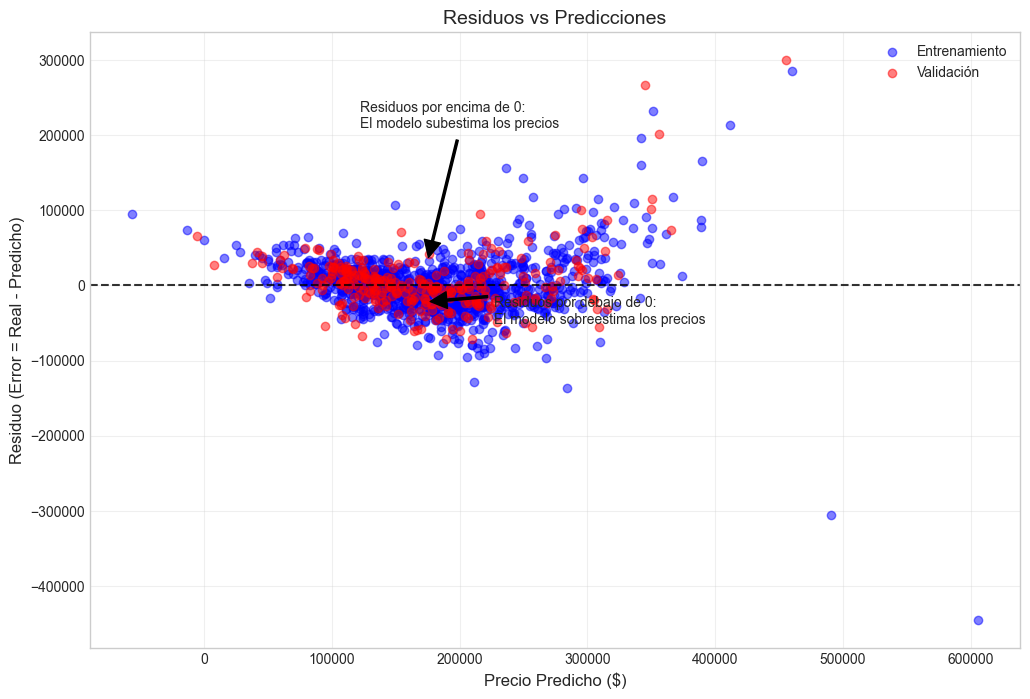

Interpretación del gráfico de residuos:
- Los residuos son los errores (valor real - valor predicho)
- Idealmente, los residuos deberían:
  * Estar distribuidos aleatoriamente alrededor de la línea horizontal y=0
  * No mostrar patrones claros
  * Tener aproximadamente la misma variabilidad a lo largo del eje X

- Si vemos patrones como:
  * Residuos que aumentan o disminuyen con el valor predicho → relación no lineal
  * Residuos que se abren en forma de embudo → heterocedasticidad (varianza no constante)
  * Muchos puntos a un lado de la línea y=0 → sesgo en las predicciones


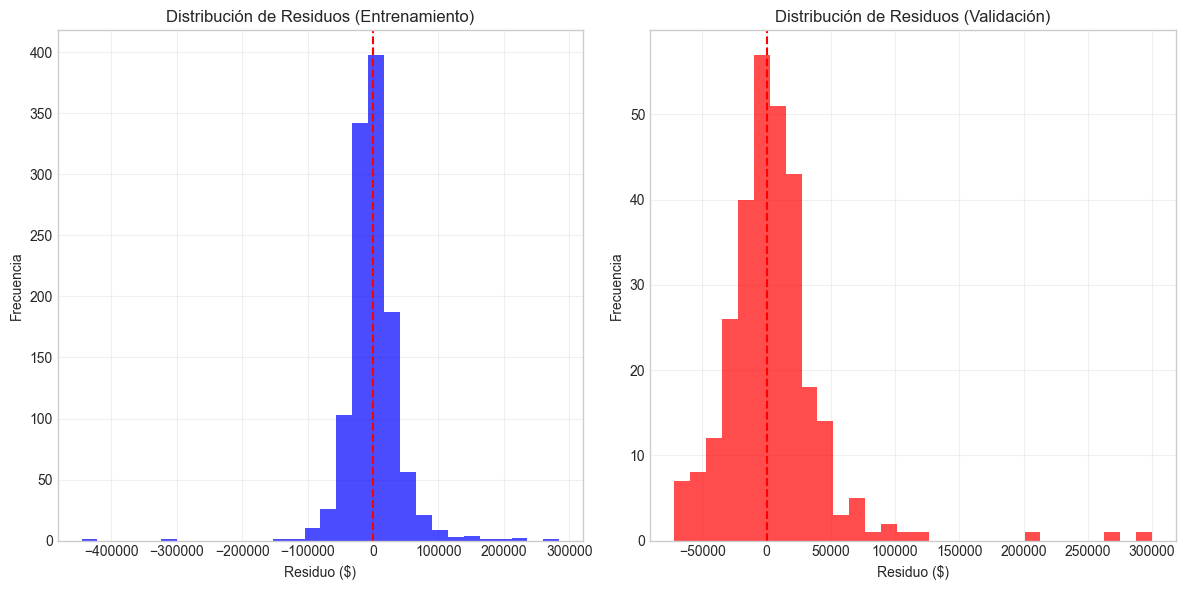

Interpretación de los histogramas de residuos:
- Idealmente, los residuos deberían seguir una distribución normal
  centrada en cero (la línea roja vertical)
- Una distribución simétrica indica que el modelo no tiene un sesgo sistemático
- Colas largas (valores extremos) pueden indicar valores atípicos que el modelo
  no maneja bien


In [61]:
# Visualizamos los residuos (errores) para detectar patrones
plt.figure(figsize=(12, 8))

# Calculamos los residuos (errores)
# Los residuos son la diferencia entre los valores reales y los predichos
residuals_train = y_train - y_train_pred
residuals_val = y_val - y_val_pred

# Graficamos los residuos vs predicciones
# Esto nos ayuda a ver si hay patrones sistemáticos en los errores
plt.scatter(y_train_pred,    # Valores en el eje X (predicciones)
            residuals_train, # Valores en el eje Y (residuos)
            alpha=0.5,       # Transparencia
            color='blue',    # Color para entrenamiento
            label='Entrenamiento')

plt.scatter(y_val_pred,      # Valores en el eje X (predicciones)
            residuals_val,   # Valores en el eje Y (residuos)
            alpha=0.5,       # Transparencia
            color='red',     # Color para validación
            label='Validación')

# Línea de referencia en y=0
# Una línea horizontal en y=0 ayuda a ver la distribución de los residuos
plt.axhline(y=0,             # Posición y de la línea horizontal
            color='k',       # Color negro
            linestyle='--',  # Estilo discontinuo
            alpha=0.8)       # Transparencia

plt.xlabel('Precio Predicho ($)', fontsize=12)
plt.ylabel('Residuo (Error = Real - Predicho)', fontsize=12)
plt.title('Residuos vs Predicciones', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Añadimos anotaciones explicativas para entender el gráfico de residuos
plt.annotate('Residuos por encima de 0:\nEl modelo subestima los precios',
             xy=(np.mean(y_val_pred), np.mean(residuals_val[residuals_val > 0])),
             xytext=(np.mean(y_val_pred)*0.7, np.max(residuals_val)*0.7),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.annotate('Residuos por debajo de 0:\nEl modelo sobreestima los precios',
             xy=(np.mean(y_val_pred), np.mean(residuals_val[residuals_val < 0])),
             xytext=(np.mean(y_val_pred)*1.3, np.min(residuals_val)*0.7),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.show()

print("Interpretación del gráfico de residuos:")
print("- Los residuos son los errores (valor real - valor predicho)")
print("- Idealmente, los residuos deberían:")
print("  * Estar distribuidos aleatoriamente alrededor de la línea horizontal y=0")
print("  * No mostrar patrones claros")
print("  * Tener aproximadamente la misma variabilidad a lo largo del eje X")
print()
print("- Si vemos patrones como:")
print("  * Residuos que aumentan o disminuyen con el valor predicho → relación no lineal")
print("  * Residuos que se abren en forma de embudo → heterocedasticidad (varianza no constante)")
print("  * Muchos puntos a un lado de la línea y=0 → sesgo en las predicciones")

# Histograma de residuos para ver su distribución
plt.figure(figsize=(12, 6))

# Creamos dos subgráficos en la misma fila
# subplot() configura y activa un subgráfico en una ubicación específica de la cuadrícula
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1 (izquierda)
plt.hist(residuals_train, bins=30, color='blue', alpha=0.7)
plt.title('Distribución de Residuos (Entrenamiento)', fontsize=12)
plt.xlabel('Residuo ($)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(True, alpha=0.3)
# axvline añade una línea vertical en x=0
plt.axvline(x=0, color='red', linestyle='--')

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2 (derecha)
plt.hist(residuals_val, bins=30, color='red', alpha=0.7)
plt.title('Distribución de Residuos (Validación)', fontsize=12)
plt.xlabel('Residuo ($)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='--')

plt.tight_layout()  # Ajusta el espaciado entre los subgráficos
plt.show()

print("Interpretación de los histogramas de residuos:")
print("- Idealmente, los residuos deberían seguir una distribución normal")
print("  centrada en cero (la línea roja vertical)")
print("- Una distribución simétrica indica que el modelo no tiene un sesgo sistemático")
print("- Colas largas (valores extremos) pueden indicar valores atípicos que el modelo")
print("  no maneja bien")

##### **10. Comparación con un Modelo Más Simple**

Comparando con un modelo simple que solo usa: OverallQual

Comparación de Modelos:
1. Modelo Simple (solo OverallQual):
   - R² en validación: 0.6505
   - RMSE en validación: $51778.63

2. Modelo Múltiple (5 características):
   - R² en validación: 0.7916
   - RMSE en validación: $39979.43

Mejora con el modelo múltiple:
   - R²: +21.70%
   - Reducción de RMSE: 22.79%


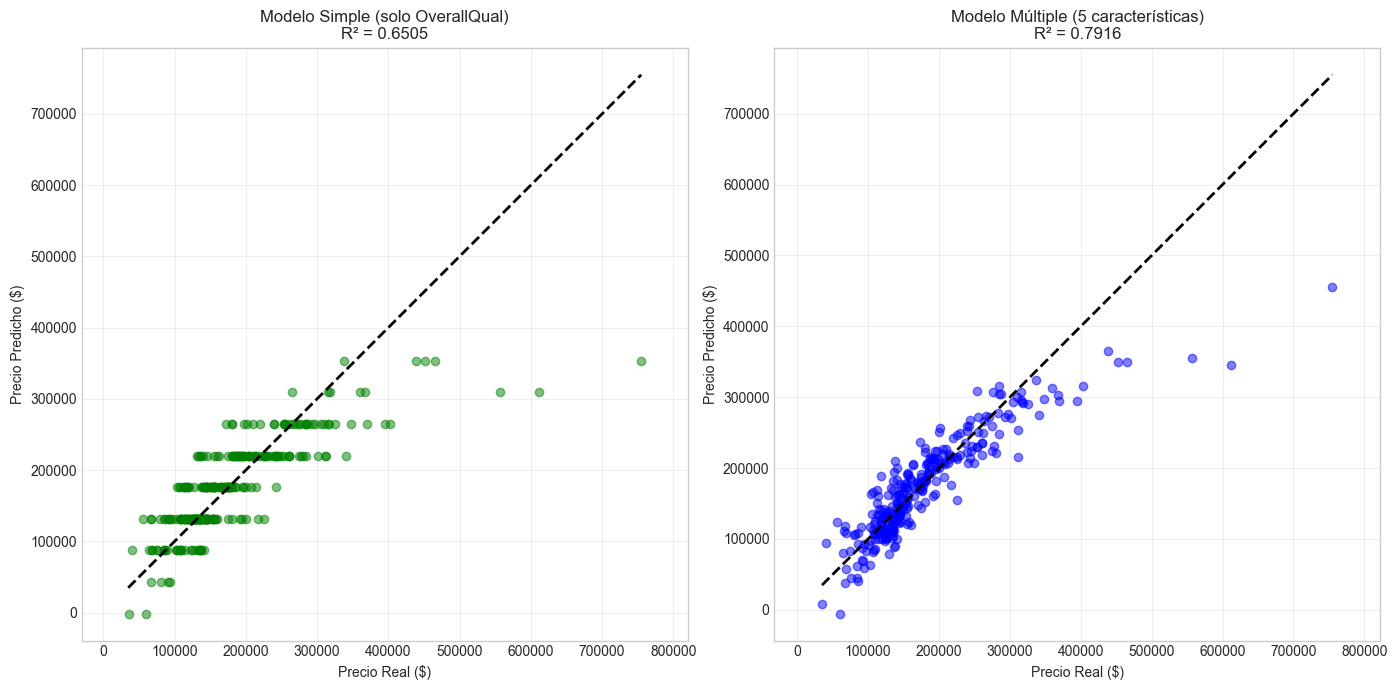


Interpretación de la comparación:
- El modelo simple que solo usa OverallQual explica 65.05% de la variación en precios
- El modelo múltiple con 5 características explica 79.16% de la variación en precios
- Esto representa una mejora de 21.70%
- El error promedio (RMSE) se redujo en 22.79%
- Los gráficos muestran cómo las predicciones se acercan más a la línea diagonal
  (predicción perfecta) en el modelo múltiple


In [69]:
# Comparamos este modelo con un modelo más simple que usa solo la característica más importante
# Esto nos ayuda a entender el beneficio de usar múltiples características

# 1. Obtenemos la característica más correlacionada con el precio
top_single_feature = correlations_with_price.index[1]  # La más correlacionada después de SalePrice
print(f"Comparando con un modelo simple que solo usa: {top_single_feature}")

# 2. Preparamos los datos para este modelo simple
X_single = train_data[top_single_feature].values.reshape(-1, 1)  # reshape convierte a columna
# Dividimos los datos igual que antes, usando la misma semilla para comparabilidad
X_train_single, X_val_single, y_train_s, y_val_s = train_test_split(
    X_single, y, test_size=0.2, random_state=42)

# 3. Estandarizamos la característica única
scaler_single = StandardScaler()  # Nuevo escalador para este modelo
X_train_single_scaled = scaler_single.fit_transform(X_train_single)
X_val_single_scaled = scaler_single.transform(X_val_single)

# 4. Añadimos columna de unos y aplicamos ecuación normal
X_train_single_b = np.c_[np.ones((X_train_single_scaled.shape[0], 1)), X_train_single_scaled]
X_val_single_b = np.c_[np.ones((X_val_single_scaled.shape[0], 1)), X_val_single_scaled]

# Aplicamos la ecuación normal para encontrar los parámetros óptimos
theta_single = np.linalg.inv(X_train_single_b.T.dot(X_train_single_b)).dot(X_train_single_b.T).dot(y_train_s)

# 5. Hacemos predicciones y evaluamos
y_train_single_pred = X_train_single_b.dot(theta_single)
y_val_single_pred = X_val_single_b.dot(theta_single)

# Calculamos R² para el modelo simple
ss_res_single_val = ((y_val_s - y_val_single_pred) ** 2).sum()
ss_tot_single_val = ((y_val_s - y_val_s.mean()) ** 2).sum()
r2_single_val = 1 - (ss_res_single_val / ss_tot_single_val)

# Calculamos RMSE para el modelo simple
rmse_single_val = np.sqrt(mean_squared_error(y_val_s, y_val_single_pred))

# 6. Comparamos resultados
print("\nComparación de Modelos:")
print(f"1. Modelo Simple (solo {top_single_feature}):")
print(f"   - R² en validación: {r2_single_val:.4f}")  # <-- corregido
print(f"   - RMSE en validación: ${rmse_single_val:.2f}")

print(f"\n2. Modelo Múltiple (5 características):")
print(f"   - R² en validación: {r2_val:.4f}")  # <-- corregido si r2_val también es escalar
print(f"   - RMSE en validación: ${rmse_val:.2f}")

# Calculamos la mejora porcentual
improvement_r2 = (r2_val - r2_single_val) / r2_single_val * 100  # <-- corregido
improvement_rmse = (rmse_single_val - rmse_val) / rmse_single_val * 100

print(f"\nMejora con el modelo múltiple:")
print(f"   - R²: +{improvement_r2:.2f}%")
print(f"   - Reducción de RMSE: {improvement_rmse:.2f}%")

# Visualizamos la comparación de predicciones entre ambos modelos
plt.figure(figsize=(14, 7))

# Creamos dos subgráficos en la misma fila
plt.subplot(1, 2, 1)
plt.scatter(y_val_s, y_val_single_pred, alpha=0.5, color='green')
plt.plot([min_price, max_price], [min_price, max_price], 'k--', lw=2)
plt.xlabel('Precio Real ($)', fontsize=10)
plt.ylabel('Precio Predicho ($)', fontsize=10)
plt.title(f'Modelo Simple (solo {top_single_feature})\nR² = {r2_single_val:.4f}', fontsize=12)  # <-- corregido
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_val_pred, alpha=0.5, color='blue')
plt.plot([min_price, max_price], [min_price, max_price], 'k--', lw=2)
plt.xlabel('Precio Real ($)', fontsize=10)
plt.ylabel('Precio Predicho ($)', fontsize=10)
plt.title(f'Modelo Múltiple (5 características)\nR² = {r2_val:.4f}', fontsize=12)  # <-- corregido
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()

print("\nInterpretación de la comparación:")
print(f"- El modelo simple que solo usa {top_single_feature} explica {r2_single_val*100:.2f}% de la variación en precios")  # <-- corregido
print(f"- El modelo múltiple con 5 características explica {r2_val*100:.2f}% de la variación en precios")  # <-- corregido
print(f"- Esto representa una mejora de {improvement_r2:.2f}%")
print(f"- El error promedio (RMSE) se redujo en {improvement_rmse:.2f}%")
print(f"- Los gráficos muestran cómo las predicciones se acercan más a la línea diagonal")
print(f"  (predicción perfecta) en el modelo múltiple")


##### **11. Conclusiones Finales**

In [71]:
# Conclusiones y consideraciones finales
print("\n===== CONCLUSIONES SOBRE LA REGRESIÓN LINEAL MÚLTIPLE CON ECUACIÓN NORMAL =====")
print("\n1. Interpretación del Modelo:")
print(f"   - Nuestro modelo de regresión lineal múltiple explica aproximadamente el {r2_val*100:.2f}% de la")
print(f"     variabilidad en los precios de viviendas usando 5 características clave.")
print(f"   - La característica '{top_features[0]}' tiene el mayor impacto en el precio,")
print(f"     con un coeficiente estandarizado de {coefficients[0][0]:.4f}.")
print(f"   - Usar múltiples características mejoró el rendimiento en un {improvement_r2:.2f}% en términos de R²")
print(f"     comparado con usar solo una característica.")

print("\n2. Ventajas de la Ecuación Normal:")
print("   - Proporciona una solución directa, sin necesidad de iteraciones o hiperparámetros.")
print("   - Garantiza encontrar el mínimo global de la función de coste MSE.")
print("   - Es determinista: siempre produce el mismo resultado para los mismos datos.")
print("   - Es muy simple de implementar con pocas líneas de código.")

print("\n3. Limitaciones de la Ecuación Normal:")
print("   - Computacionalmente costosa para conjuntos de datos grandes (complejidad O(n³)).")
print("   - Puede tener problemas numéricos si hay multicolinealidad (alta correlación entre variables).")
print("   - No es adecuada para problemas donde el número de características es mayor que el número de ejemplos.")
print("   - No funciona bien cuando hay colinealidad perfecta (características linealmente dependientes).")

print("\n4. Próximos Pasos:")
print("   - Explorar técnicas de regularización (Ridge, Lasso) para evitar el sobreajuste.")
print("   - Implementar el Descenso de Gradiente como alternativa a la Ecuación Normal.")
print("   - Considerar transformaciones no lineales de las características para capturar relaciones más complejas.")
print("   - Incluir variables categóricas (codificadas adecuadamente) para mejorar el poder predictivo.")
print("   - Probar técnicas de selección de características más avanzadas que la simple correlación.")
print("   - Explorar otros algoritmos como árboles de decisión o modelos de ensamble para comparar resultados.")


===== CONCLUSIONES SOBRE LA REGRESIÓN LINEAL MÚLTIPLE CON ECUACIÓN NORMAL =====

1. Interpretación del Modelo:
   - Nuestro modelo de regresión lineal múltiple explica aproximadamente el 79.16% de la
     variabilidad en los precios de viviendas usando 5 características clave.
   - La característica 'OverallQual' tiene el mayor impacto en el precio,
     con un coeficiente estandarizado de 32584.1658.
   - Usar múltiples características mejoró el rendimiento en un 21.70% en términos de R²
     comparado con usar solo una característica.

2. Ventajas de la Ecuación Normal:
   - Proporciona una solución directa, sin necesidad de iteraciones o hiperparámetros.
   - Garantiza encontrar el mínimo global de la función de coste MSE.
   - Es determinista: siempre produce el mismo resultado para los mismos datos.
   - Es muy simple de implementar con pocas líneas de código.

3. Limitaciones de la Ecuación Normal:
   - Computacionalmente costosa para conjuntos de datos grandes (complejidad O(n³